## MLB Analysis

這次我們會簡單的幾句話跟大家說明資料科學在美國職棒的運用及影響，以下我們會分析下列幾項：

* 調整物價波動後，大聯盟平均薪資的變化
* 各隊薪資佔聯盟總薪資的佔比
* 飛球革命對於大聯盟的影響
* 整體薪資和戰績的關係
* 薪資組合和戰績的關係


### 首先先匯入會用到的函式庫

In [1]:
library(ggplot2)
library(dplyr)
library(robustbase)
getwd()
dir()

Warning message:
"package 'ggplot2' was built under R version 3.5.3"Warning message:
"package 'dplyr' was built under R version 3.5.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] "C:/Users/Aaron/Desktop/大二下/使用R進行資料分析/MLB-baseball"

[1] "25人名單薪資"                            
 [2] "Data Analysis-pie chart 陳聿哲 .ipynb"   
 [3] "Data Analysis - 豐瑾.ipynb"              
 [4] "Data Analysis.ipynb"                     
 [5] "strange html_table result in Rstudio.Rmd"
 [6] "年度統計"                                
 [7] "爬取各年球隊薪資.ipynb"                  
 [8] "爬取各隊25人名單薪資.ipynb"              
 [9] "清洗各年度戰績.ipynb"                    
[10] "球隊薪資"                                
[11] "戰績"                                    
[12] "戰績與薪資組合的資料清洗.ipynb"

In [2]:
data <- read.csv("球隊薪資\\2018.csv")
head(data)


Team,Roster,X25.Man.Payroll,Injured.Reserve,Retained,Buried,Suspended,X2018.Total.Payroll,Rank
Boston Red Sox,36,167955780,18074000,41755860,2180000,0,227398860,1
San Francisco Giants,32,119689218,64341827,21136053,3283000,0,205665348,2
Los Angeles Dodgers,40,160502596,3908850,30541679,5590000,0,199582045,3
Chicago Cubs,37,152092957,37451220,1216894,2725000,3200000,194259933,4
Washington Nationals,35,130197979,8999485,41161720,4481000,0,181382609,5
New York Yankees,38,148010829,22568376,9249414,3130000,0,180098151,6


In [3]:
salList <- list()
for (i in c(2011:2018))
{
    salList[[i - 2010]] <- read.csv(paste("球隊薪資\\", toString(i), ".csv", sep=""))
}

standingList <- list()
for (i in c(2011:2018))
{
    standingList[[i - 2010]] <- read.csv(paste("戰績\\", toString(i), ".csv", sep=""))
}
head(standingList[[1]])

Name,W,L,PCT,GB,HOME,AWAY,RS,RA,DIFF,STRK,L10
Philadelphia Phillies,102,60,0.630,-,52-29,50-31,713,529,184,W4,4月6日
New York Yankees,97,65,0.599,5,52-29,45-36,867,657,210,L4,5月5日
Milwaukee Brewers,96,66,0.593,6,57-24,39-42,721,638,83,W2,7月3日
Texas Rangers,96,66,0.593,6,52-29,44-37,855,677,178,W6,9月1日
Detroit Tigers,95,67,0.586,7,50-31,45-36,787,711,76,W4,7月3日
Arizona Diamondbacks,94,68,0.580,8,51-30,43-38,731,662,69,L1,7月3日


In [4]:
inflation <- c(1, 1.017, 1.032255, 1.04051304, 1.047796631, 1.069800361, 1.092266168, 1.113019225)
meanSal <- c()

for (i in c(1:8))
{
    meanSal[i] <- mean(salList[[i]][, "X25.Man.Payroll"]) * inflation[i] / 10000000
}

salary <- data.frame(meanSalary=meanSal, year=c(2011:2018))


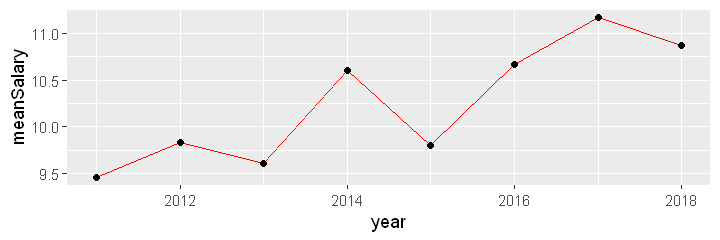

In [5]:
# Create a line plot showing the change in meanSalary over time
# 少了單位"千萬"和美化它
options(repr.plot.width = 6, repr.plot.height = 2)
ggplot(salary, aes(year, meanSalary)) + geom_line(color="red") + geom_point()

# 各隊薪資占比 (以年份作單位)
* X25.Man.Payroll 圓餅圖
* X2018.Total.Payroll 圓餅圖

In [6]:
# 整理salList 成一個dataframe ,mutate new column---year ,column : X25.Man.Payroll
tmp_data <- lapply(salList,function(x){colnames(x)[8] <- "Total.Payroll" ;return(x)})
names(tmp_data) <- 2011 : 2018
for (i in 1 : length(tmp_data)){
    tmp <- tmp_data[[i]][,c(1,3,8)]
    tmp <- tmp %>% mutate(year = names(tmp_data)[i])
    if(i == 1){
        data <- tmp
    }
    else {
        data <- rbind(data,tmp)
    }
}
# row 61 is useless  : Florida Marlins               0        918033   2012
data <- data[-61,]

data[,4] <- as.factor(data[,4])
head(data)


Team,X25.Man.Payroll,Total.Payroll,year
New York Yankees,212609678,213559678,2011
Boston Red Sox,164517590,172553261,2011
Philadelphia Phillies,169799882,169968182,2011
Los Angeles Angels,133613959,146648559,2011
New York Mets,96163418,141831841,2011
Chicago Cubs,124652698,139477698,2011


## data 新增欄位 W 
### 讀取戰績資料集
### 合併新的欄位W

In [7]:
# read in :
for (i in as.character(2011: 2018)){
    rd <- read.csv(paste("戰績\\",i,".csv",sep = ""))
    tmp <- rd[,c(1,2)] %>% mutate(year = i)
    
    if(i == 2011){
        new_data <- tmp
    }
    else {
        new_data <- rbind(new_data,tmp)
    }
}
colnames(new_data)[1] <- "Team"
data <- data %>% arrange(year,Team)
new_data <- new_data %>% arrange(year,Team)
head(data)
head(new_data)
final_data <- merge(data,new_data,by = c("Team","year"))
print(final_data)

Team,X25.Man.Payroll,Total.Payroll,year
Arizona Diamondbacks,57930520,65784971,2011
Atlanta Braves,98521630,99830230,2011
Baltimore Orioles,94391741,94391741,2011
Boston Red Sox,164517590,172553261,2011
Chicago Cubs,124652698,139477698,2011
Chicago White Sox,123584951,130623749,2011


Team,W,year
Arizona Diamondbacks,94,2011
Atlanta Braves,89,2011
Baltimore Orioles,69,2011
Boston Red Sox,90,2011
Chicago Cubs,71,2011
Chicago White Sox,79,2011


                     Team year X25.Man.Payroll Total.Payroll   W
1    Arizona Diamondbacks 2011        57930520      65784971  94
2    Arizona Diamondbacks 2012        73439259      82959205  81
3    Arizona Diamondbacks 2013        75126043      88316478  81
4    Arizona Diamondbacks 2014        68514917     106482519  64
5    Arizona Diamondbacks 2015        45142733      76781801  79
6    Arizona Diamondbacks 2016        78823003      97874482  69
7    Arizona Diamondbacks 2017        81644775     102619475  93
8    Arizona Diamondbacks 2018       109501628     143324597  82
9          Atlanta Braves 2011        98521630      99830230  89
10         Atlanta Braves 2012        86492616      97928056  94
11         Atlanta Braves 2013        86661842      94947950  96
12         Atlanta Braves 2014       102713304     116865707  79
13         Atlanta Braves 2015        55022799     110838389  67
14         Atlanta Braves 2016        46917344      96080633  68
15         Atlanta Braves

##  X25.Man.Payroll bar chart per year 

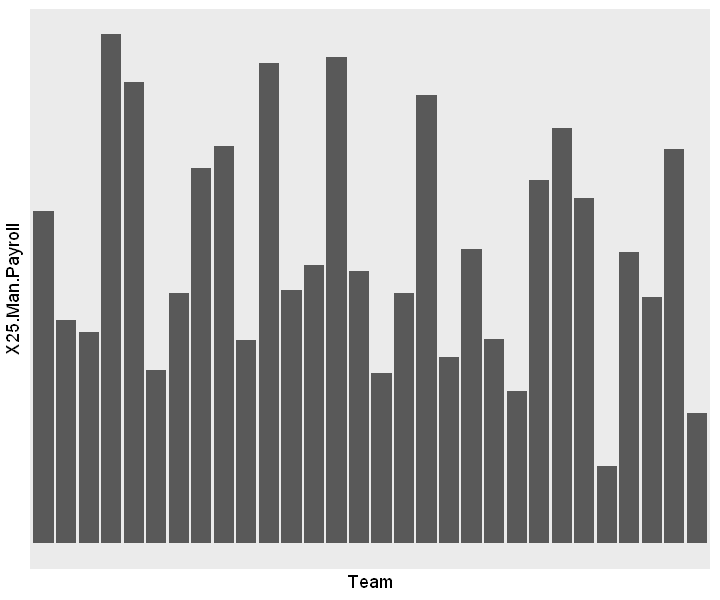

In [8]:
# look at year 2018
data_2018 <-  data %>%　filter(year %in% as.factor(2018))
options(repr.plot.width=6, repr.plot.height=5)
ggplot(data_2018 ,aes(x = Team ,y = X25.Man.Payroll )) +
    geom_bar(stat = "identity") +
    theme(axis.text = element_blank(),
        axis.ticks = element_blank(),
        panel.grid  = element_blank())


###  待改

Warning message in lf.cov(init, x = x):
"X'WX is almost singular. Consider using cov = ".vcov.w""

Warning message in lf.cov(init, x = x):
"X'WX is almost singular. Consider using cov = ".vcov.w""


Call:
lmrob(formula = W ~ X25.Man.Payroll, data = final_data)
 \--> method = "MM"
Residuals:
    Min      1Q  Median      3Q     Max 
-30.049  -6.137  -0.196   6.377  21.098 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     6.726e+01  1.571e+00   42.81   <2e-16 ***
X25.Man.Payroll 1.404e-07  1.404e-08   10.01   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Robust residual standard error: 9.7 
Multiple R-squared:  0.2748,	Adjusted R-squared:  0.2718 
Convergence in 9 IRWLS iterations

Robustness weights: 
 24 weights are ~= 1. The remaining 213 ones are summarized as
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.3167  0.8459  0.9484  0.9022  0.9854  0.9986 
Algorithmic parameters: 
       tuning.chi                bb        tuning.psi        refine.tol 
        1.548e+00         5.000e-01         4.685e+00         1.000e-07 
          rel.tol         scale.tol         solve.tol       eps.outlier 
        1.0

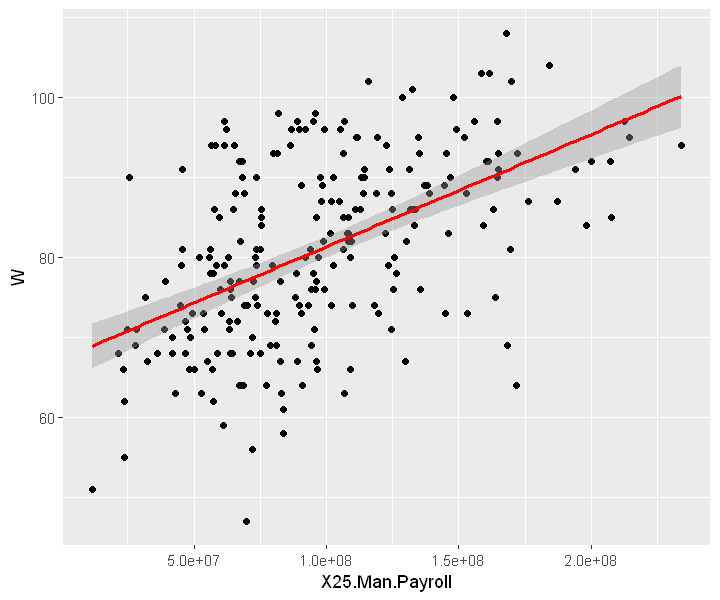

In [9]:
ggplot(final_data, aes(x = X25.Man.Payroll, y = W)) + 
  geom_point() +
  stat_smooth(method = "lmrob", col = "red")

a <- lmrob(W ~ X25.Man.Payroll, data=final_data)
summary(a)